### Linear Regression

Mean Squared Error: 174.7444801313201


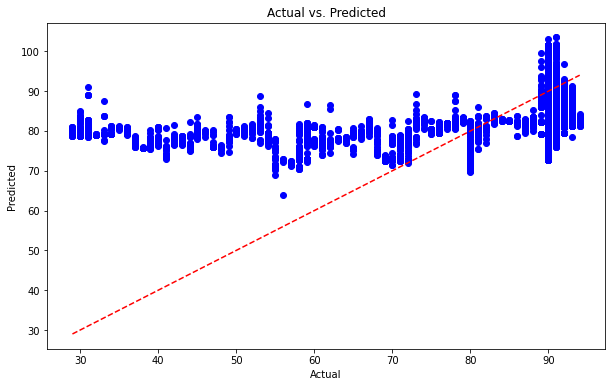

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Stau.csv")
date_format = "%H:%M:%S.%f"
data["Time"] = pd.to_datetime(data["Time"], format=date_format)
# data1 = data1.set_index("Time")
data.set_index("Time", inplace=True)

data = data.iloc[10:]

data.columns = ['Engine_Coolant_Temperature', 'Intake_Manifold_Abs_Pressure', 'Engine_RPM', 'Vehicle_Speed', 'Intake_Air_Temperature', 'AirFlow_Rate', 'Throttle_Position', 'Air_Temperature', 'Acc_Pedal_Pos_D', 'Acc_Pedal_Pos_E']

# Split data into features (X) and target variable (y)
feature="Engine_Coolant_Temperature"
X = data.drop(columns=[feature])
y = data[feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can further fine-tune hyperparameters or try other regression algorithms like Decision Trees, Random Forests, etc.



# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


### Random Forest

Random Forest Mean Squared Error: 0.8779858191699786


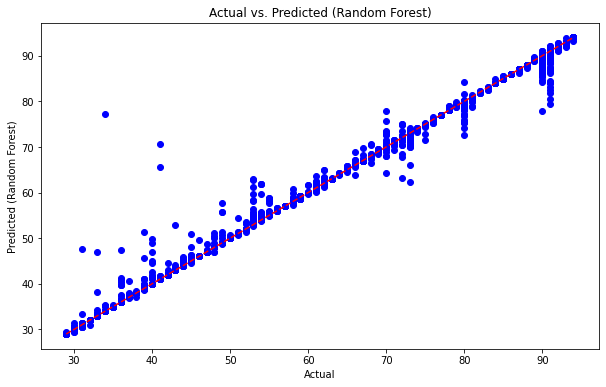

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set using the Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted (Random Forest)')
plt.title('Actual vs. Predicted (Random Forest)')
plt.show()


### Gradient Boos